In [80]:
#@title colab conda 설치
# Install Miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O miniconda.sh
!bash miniconda.sh -b -p /usr/local -u # Use -u to update existing installation
!rm miniconda.sh

# Update conda environment (adjust python version if necessary)
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')


# Install dlib using conda
!conda install -c conda-forge dlib -y

--2025-07-28 07:52:44--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160039710 (153M) [application/octet-stream]
Saving to: ‘miniconda.sh’

miniconda.sh        100%[===================>] 152.62M   269MB/s    in 0.6s    

2025-07-28 07:52:45 (269 MB/s) - ‘miniconda.sh’ saved [160039710/160039710]

PREFIX=/usr/local
Unpacking payload ...
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.

I

In [81]:
#@title 1
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


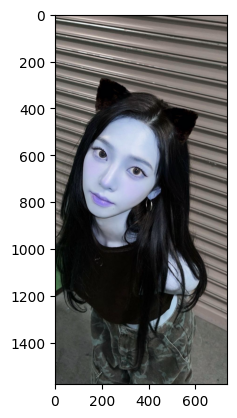

In [82]:
#@title 2
#home_dir = os.getenv('HOME')
my_image_path = os.path.join('/content/drive/MyDrive/Colab/work/image/karina.jpg')
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)


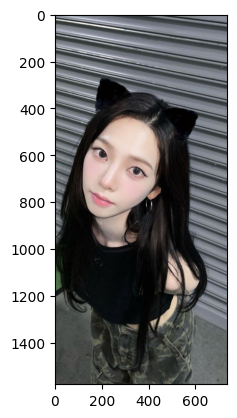

In [83]:
#@title 3
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력


In [84]:
#@title 4
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [85]:
#@title 5
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(33, 504) (418, 889)]]


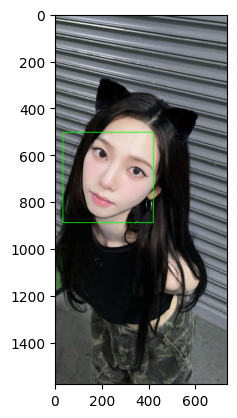

In [86]:
#@title 6
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [87]:
# 1. 다운로드
!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

# 2. 압축 해제
!bzip2 -d mmod_human_face_detector.dat.bz2

# 3. 드라이브로 이동시킬 경우:
!mv mmod_human_face_detector.dat /content/drive/MyDrive/Colab/work/model/

--2025-07-28 07:53:49--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/mmod_human_face_detector.dat.bz2 [following]
--2025-07-28 07:53:49--  https://dlib.net/files/mmod_human_face_detector.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  1.64MB/s    in 0.4s    

2025-07-28 07:53:49 (1.64 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [88]:
#@title 7
model_path = os.path.join('/content/drive/MyDrive/Colab/work/model/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


기울기: 26.57도


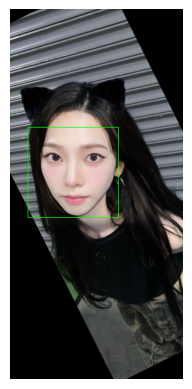

In [89]:



if len(dlib_rects) == 0:
    print("얼굴이 감지되지 않았습니다.")
else:
    face = dlib_rects[0]  # 항상 하나의 얼굴만 있다고 가정

    # 2. 랜드마크 추출
    landmarks = landmark_predictor(img_bgr, face)

    # 3. 눈 좌표 (왼쪽 눈: 36, 오른쪽 눈: 45)
    left_eye = (landmarks.part(36).x, landmarks.part(36).y)
    right_eye = (landmarks.part(45).x, landmarks.part(45).y)

    # 4. 기울기 계산
    delta_x = right_eye[0] - left_eye[0]
    delta_y = right_eye[1] - left_eye[1]
    angle = np.degrees(np.arctan2(delta_y, delta_x))
    print(f"기울기: {angle:.2f}도")

    # 5. 눈 중심 기준으로 이미지 회전
    eye_center = ((left_eye[0] + right_eye[0]) // 2,
                  (left_eye[1] + right_eye[1]) // 2)
    M = cv2.getRotationMatrix2D(eye_center, angle, 1.0)
    img_rotated = cv2.warpAffine(img_bgr, M, (img_bgr.shape[1], img_bgr.shape[0]))

    # 6. 회전된 이미지에서 얼굴 재탐지
    rotated_gray = cv2.cvtColor(img_rotated, cv2.COLOR_BGR2GRAY)
    rotated_faces = detector_hog(rotated_gray, 1)

    if len(rotated_faces) == 0:
        print("회전된 이미지에서도 얼굴을 찾지 못했습니다.")
    else:
        rotated_face = rotated_faces[0]
        l, t, r, b = rotated_face.left(), rotated_face.top(), rotated_face.right(), rotated_face.bottom()

        # 7. 얼굴 박스 시각화
        img_vis = img_rotated.copy()
        cv2.rectangle(img_vis, (l, t), (r, b), (0, 255, 0), 2)

        # 8. 출력
        img_rgb = cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()


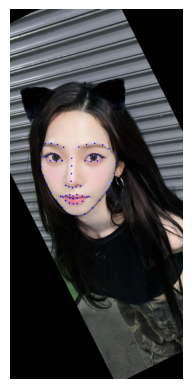

In [90]:
# 9. 회전된 얼굴에 대해 랜드마크 예측
rotated_landmarks = landmark_predictor(rotated_gray, rotated_face)

# 10. 랜드마크 리스트 저장
landmarks_list = []
for i in range(68):
    x = rotated_landmarks.part(i).x
    y = rotated_landmarks.part(i).y
    landmarks_list.append((x, y))  # 리스트에 (x, y) 추가

# 11. 시각화
img_with_landmarks = img_rotated.copy()
for (x, y) in landmarks_list:
    cv2.circle(img_with_landmarks, (x, y), 3, (255, 0, 0), -1)

# 12. 출력
img_rgb = cv2.cvtColor(img_with_landmarks, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [91]:
#@title 9
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(rotated_gray, rotated_face)

        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [93]:
#@title 11
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(260, 734)
(x,y) : (260,541)
(w,h) : (386,386)


In [94]:
#@title 12
sticker_path = os.path.join('/content/drive/MyDrive/Colab/work/image/cat-whiskers.png') # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(386, 386, 3)


In [95]:
#@title 13
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (67,155)


In [96]:
#@title 14
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (67,155)


In [97]:
#@title 15
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_with_landmarks[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_with_landmarks[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


In [98]:
def paste_sticker_with_alpha(base_img, sticker_img, center_x, center_y, scale=1.0):
    """
    알파 채널이 포함된 스티커 이미지를 base_img에 덮어씌우는 함수

    Parameters:
    - base_img (ndarray): BGR 원본 이미지
    - sticker_img (ndarray): RGBA 스티커 이미지 (알파 채널 포함)
    - center_x, center_y (int): 스티커 중심을 배치할 기준 좌표
    - scale (float): 스티커의 크기 조정 비율

    Returns:
    - base_img에 스티커가 덮인 결과 이미지 (ndarray)
    """

    # 스티커 크기 조정
    h_s, w_s = sticker_img.shape[:2]
    new_w = int(w_s * scale)
    new_h = int(h_s * scale)
    sticker_resized = cv2.resize(sticker_img, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # 중심 기준 좌표 보정 (왼쪽 상단 좌표)
    x1 = center_x - new_w // 2
    y1 = center_y - new_h // 2

    # 스티커 범위 잘라내기 (화면 밖으로 나가는 경우 대비)
    if x1 < 0:
        sticker_resized = sticker_resized[:, -x1:]
        x1 = 0
    if y1 < 0:
        sticker_resized = sticker_resized[-y1:, :]
        y1 = 0

    h_s, w_s = sticker_resized.shape[:2]
    if x1 + w_s > base_img.shape[1]:
        w_s = base_img.shape[1] - x1
        sticker_resized = sticker_resized[:, :w_s]
    if y1 + h_s > base_img.shape[0]:
        h_s = base_img.shape[0] - y1
        sticker_resized = sticker_resized[:h_s, :]

    # 알파 채널 분리
    sticker_rgb = sticker_resized[:, :, :3]
    alpha_mask = sticker_resized[:, :, 3] / 255.0
    alpha_mask = alpha_mask[:, :, np.newaxis]  # (H, W, 1)

    # 대상 영역 추출
    roi = base_img[y1:y1 + h_s, x1:x1 + w_s]

    # 블렌딩
    blended = (alpha_mask * sticker_rgb + (1 - alpha_mask) * roi).astype(np.uint8)

    # 적용
    base_img[y1:y1 + h_s, x1:x1 + w_s] = blended
    return base_img


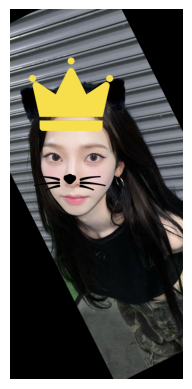

In [106]:
# 스티커 주소 설정
cat_whisker = cv2.imread('/content/drive/MyDrive/Colab/work/image/cat-whiskers.png', cv2.IMREAD_UNCHANGED)
crown = cv2.imread('/content/drive/MyDrive/Colab/work/image/king.png', cv2.IMREAD_UNCHANGED)

# 기준점: 코 아래 (랜드마크 33)
nose = landmarks.part(30)
center_x, center_y = nose.x + 40, nose.y + 20 # 약간 아래

forehead_x = landmark[30][0] # 이미지에서 코 부위의 x값
forehead_y = landmark[30][1] - dlib_rect.height()//2

# 스티커 붙이기
img_result = paste_sticker_with_alpha(img_rotated.copy(), cat_whisker, center_x, center_y, scale=0.6)
img_result = paste_sticker_with_alpha(img_result, crown, forehead_x, forehead_y - 200, scale=0.7)

# 시각화
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

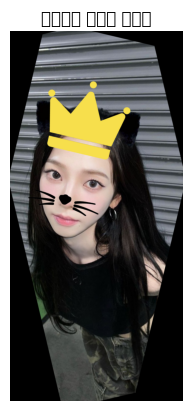

In [107]:
# 1. 원래 이미지에서 angle만큼 회전 (보정)
M = cv2.getRotationMatrix2D(eye_center, angle, 1.0)
img_rotated = cv2.warpAffine(img_bgr, M, (img_bgr.shape[1], img_bgr.shape[0]))

# (여기서 얼굴 검출, landmark 추출, 스티커 붙이는 작업 수행)
# 결과 이미지 → img_result

# 2. 보정한 만큼 반대로 다시 회전해서 원래대로 되돌리기
M_restore = cv2.getRotationMatrix2D(eye_center, -angle/2, 1.0)
restored_img = cv2.warpAffine(img_result, M_restore, (img_result.shape[1], img_result.shape[0]))

# 3. 결과 출력
plt.imshow(cv2.cvtColor(restored_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("원래대로 복원된 이미지")
plt.show()
